<img src="https://raw.githubusercontent.com/euroargodev/argopy/master/docs/_static/argopy_logo_long.png" alt="argopy logo" width="200"/> 

# Visualise one float BGC data

This notebook shows how to:
- download BGC-Argo data
- download info from Argo NVS Reference Tables about a parameter
- plot a map with float trajectory

## Import and set-up

In [1]:
from argopy import DataFetcher  # This is the class to work with Argo data
from argopy import ArgoIndex  #  This is the class to work with Argo index
from argopy import ArgoNVSReferenceTables  # This is the class to retrieve data from Argo reference tables
from argopy import ArgoColors  # This is a class with usefull pre-defined colors
from argopy.plot import scatter_map  # This is a function to easily make maps 

import numpy as np
from matplotlib import pyplot as plt

/Users/gmaze/miniconda3/envs/argopy-docs/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Find a float to work with

For this demo notebook, we'll randomly select a BGC float to work with.

For your own use, you can simply overwrite the ``WMO`` variable content with your favorite float.

In [2]:
# Load the BGC-synthetic profiles index
# rq: we work with synthetic profiles because that's the only dataset available from the erddap at this point (2023/07/21)
idx = ArgoIndex(index_file='bgc-s').load()  
idx

<argoindex.pyarrow>
Host: https://data-argo.ifremer.fr
Index: argo_synthetic-profile_index.txt
Convention: argo_synthetic-profile_index (Synthetic-Profile directory file of the Argo GDAC)
Loaded: True (287271 records)
Searched: False

In [3]:
iprof = np.random.randint(0, idx.N_FILES)
WMO = idx.to_dataframe().iloc[iprof]['wmo']
print('We will work with float: %i' % WMO)

We will work with float: 6903240


In [4]:
idx.search_wmo(WMO)

<argoindex.pyarrow>
Host: https://data-argo.ifremer.fr
Index: argo_synthetic-profile_index.txt
Convention: argo_synthetic-profile_index (Synthetic-Profile directory file of the Argo GDAC)
Loaded: True (287271 records)
Searched: True (648 matches, 0.2256%)

## Load all possible data from this float

In [13]:
%%time
if idx.N_MATCH < 200:
    f = DataFetcher(ds='bgc', mode='expert', params='all').float(WMO).load()
else:    
    print("This float has a large number of profiles (%i) and it could be tuff for the erddap server to retrieve so much data, so we limit download to 200 profiles" % idx.N_MATCH)
    f = DataFetcher(ds='bgc', mode='expert', params='all').profile(WMO, np.arange(0, 200)).load()
f

This float has a large number of profiles (648) and it could be tuff for the erddap server to retrieve so much data, so we limit download to 200 profiles
CPU times: user 1min 5s, sys: 1.31 s, total: 1min 6s
Wall time: 1min 26s


<datafetcher.erddap>
Name: Ifremer erddap Argo BGC data fetcher for profiles
API: https://erddap.ifremer.fr/erddap
Domain: bgc;WMO6903240_CYC0_CYC1_CYC2_ ... 95_CYC196_CYC197_CYC198_CYC199
BGC variables: ['BBP700', 'BISULFIDE', 'CDOM', 'CHLA', 'DOWNWELLING_PAR', 'DOWN_IRRADIANCE380', 'DOWN_IRRADIANCE412', 'DOWN_IRRADIANCE490', 'DOXY', 'NITRATE', 'PRES', 'PSAL', 'TEMP']
BGC 'must be measured' variables: []
Performances: cache=False, parallel=False
User mode: expert
Dataset: bgc
Loaded: True

In [14]:
# Check the data:
ds = f.data
ds

<xarray.Dataset>
Dimensions:                            (N_POINTS: 178297)
Coordinates:
    LATITUDE                           (N_POINTS) float64 43.16 43.16 ... 42.56
    LONGITUDE                          (N_POINTS) float64 28.99 28.99 ... 41.03
    TIME                               (N_POINTS) datetime64[ns] 2018-03-29T0...
  * N_POINTS                           (N_POINTS) int64 0 1 2 ... 178295 178296
Data variables: (12/84)
    BBP700                             (N_POINTS) float32 ...
    BBP700_ADJUSTED                    (N_POINTS) float32 ...
    BBP700_ADJUSTED_ERROR              (N_POINTS) float32 ...
    BBP700_ADJUSTED_QC                 (N_POINTS) int64 0 0 0 0 0 ... 0 0 0 0 0
    BBP700_DATA_MODE                   (N_POINTS) <U1 'R' 'R' 'R' ... 'R' 'R'
    BBP700_QC                          (N_POINTS) int64 0 2 2 0 0 ... 0 2 0 0 2
    ...                                 ...
    TEMP_ADJUSTED                      (N_POINTS) float32 ...
    TEMP_ADJUSTED_ERROR                (N_POINTS) float32 ...
    TEMP_ADJUSTED_QC                   (N_POINTS) int64 0 0 0 0 0 ... 0 0 0 0 0
    TEMP_DATA_MODE                     (N_POINTS) <U1 'R' 'R' 'R' ... 'R' 'R'
    TEMP_QC                            (N_POINTS) int64 1 8 1 8 8 ... 1 8 1 1 8
    TIME_QC                            (N_POINTS) int64 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2023/07/21
    Fetched_constraints:  bgc;WMO6903240_CYC0_CYC1_CYC2_CYC3_CYC4_CYC5_CYC6_C...
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...

## Make a map with float trajectory

Rq: we could have done this without downloading the data by working directly with an ArgoIndex

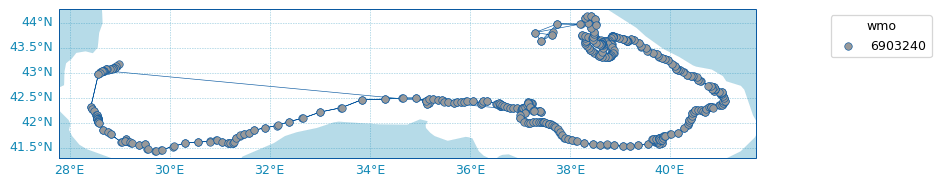

In [26]:
scatter_map(f.index, set_global=False);

We can also make a scatter map with a BGC parameter data mode.

Since we float was randomly selected, we don't know which BGC parameter are available, so we need to first make a list of these:

## Make a map with one BGC parameter data mode

In [21]:
# Get the full Argo profile index for this float:
df = f.to_index(full=True)
df

,file,date,latitude,longitude,ocean,profiler_code,institution_code,parameters,parameter_data_mode,date_update,wmo,cyc,institution,profiler
0,coriolis/6903240/profiles/SD6903240_001.nc,2018-03-29 11:52:00,43.138,28.947,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRDRRRRARRRR,2022-09-07 12:14:54,6903240,1,"Ifremer, France",Unknown
1,coriolis/6903240/profiles/SD6903240_001D.nc,2018-03-29 07:10:00,43.163,28.992,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRDRRRRARRRR,2022-09-07 12:14:38,6903240,1,"Ifremer, France",Unknown
2,coriolis/6903240/profiles/SD6903240_002.nc,2018-03-30 11:42:00,43.100,28.906,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRDRRRRARRRR,2022-09-07 12:15:36,6903240,2,"Ifremer, France",Unknown
3,coriolis/6903240/profiles/SD6903240_002D.nc,2018-03-29 14:42:00,43.129,28.929,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRDRRRRARRRR,2022-09-07 12:15:12,6903240,2,"Ifremer, France",Unknown
4,coriolis/6903240/profiles/SD6903240_003.nc,2018-03-31 11:45:00,43.089,28.880,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRDRRRRARRRR,2022-09-07 12:16:09,6903240,3,"Ifremer, France",Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,coriolis/6903240/profiles/SR6903240_322D.nc,2022-06-28 06:12:00,43.799,37.301,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRARRRRARRRR,2022-08-30 22:26:14,6903240,322,"Ifremer, France",Unknown
644,coriolis/6903240/profiles/SR6903240_323.nc,2022-07-08 04:54:00,43.752,37.642,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRARRRRARRRR,2022-08-30 22:26:56,6903240,323,"Ifremer, France",Unknown
645,coriolis/6903240/profiles/SR6903240_323D.nc,2022-07-03 06:10:00,43.625,37.428,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRARRRRARRRR,2022-08-30 22:26:41,6903240,323,"Ifremer, France",Unknown
646,coriolis/6903240/profiles/SR6903240_324.nc,2022-07-13 04:58:00,43.821,37.665,A,836,IF,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRARRRRARRRR,2022-08-30 22:27:21,6903240,324,"Ifremer, France",Unknown


In [51]:
# ``f.fetcher.indexfs`` is the ArgoIndex instance used by the erddap fetcher ``f``
idx = f.fetcher.indexfs

# Get the list of BGC parameters:
bgc_params = idx.read_params()
[bgc_params.remove(p) for p in ['PRES', 'TEMP', 'PSAL']]  # Remove core variables from the list
bgc_params

['BBP700',
 'BISULFIDE',
 'CDOM',
 'CHLA',
 'DOWNWELLING_PAR',
 'DOWN_IRRADIANCE380',
 'DOWN_IRRADIANCE412',
 'DOWN_IRRADIANCE490',
 'DOXY',
 'NITRATE']

In [52]:
# Randomly select one BGC parameter to work with:
param = bgc_params[np.random.randint(0, len(bgc_params))]
param

'DOWN_IRRADIANCE412'

In [53]:
# To make the scatter map, we need to have the data mode available in one DataFrame column
# so we need to add a new column with the DATA_MODE of the PARAMETER:
df["variables"] = df["parameters"].apply(lambda x: x.split())
df["%s_DM" % param] = df.apply(lambda x: x['parameter_data_mode'][x['variables'].index(param)] if param in x['variables'] else '', axis=1)

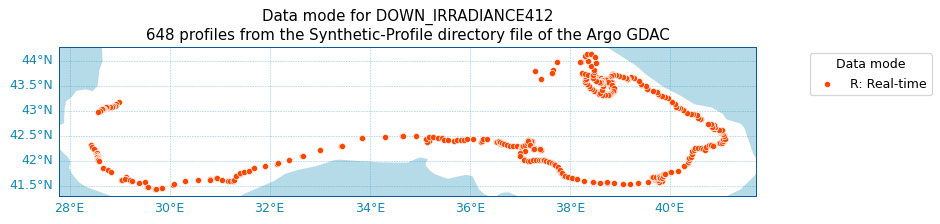

In [58]:
# Finally plot the map:
fig, ax = scatter_map(df,
                        hue="%s_DM" % param,
                        cmap="data_mode",
                        markersize=24,
                        markeredgecolor='w',
                        legend_title='Data mode')
ax.set_title("Data mode for %s\n%i profiles from the %s" % (param, idx.N_MATCH, idx.convention_title));

## Plot BGC data